In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly

# Entrenamiento con t_0 y se entregan las predicciones t1

## EDA

Lectura de Data

In [2]:
X_t0 = pd.read_csv(r"X_t0")
y_t0 = pd.read_csv(r"y_t0")
X_t1 = pd.read_csv(r"X_t1")

In [9]:
def exploratory_data_analysis(dataframe):
    # shape
    r,c = dataframe.shape
    print(f"El dataframe tiene {r} filas y {c} columnas\n")

    #nombre de columnas
    c_names = dataframe.columns.values
    print(f"El DataFrame esta compuesto por las siguientes columnas: {c_names}\n")

    #vista general
    first5 = dataframe[:5]
    print(f"Primeras 5 filas:\n ")
    display(first5)

    #info
    print("Info general de dataframe:\n")
    print(dataframe.info())

    # describe
    desc = dataframe.describe()
    print(f"Descripción numérica del Dataframe:\n")
    display(desc)

    # Valores nulos por columna
    cols_nulls = (dataframe==-1).sum()
    print(f"Cantidad de valores nulos por columna:\n")
    display(cols_nulls)

    #Valores únicos por columna
    uniq_x_cols = dataframe.nunique()
    print("Cantidad de valores únicos por columna:\n")
    display(uniq_x_cols)



In [10]:
exploratory_data_analysis(X_t0)

El dataframe tiene 397039 filas y 31 columnas

El DataFrame esta compuesto por las siguientes columnas: ['DaysSinceJob' 'CreditCap' 'JobStatus' 'Speed24h' 'AliveSession'
 'BankSpots8w' 'HustleMinutes' 'RiskScore' 'AliasMatch' 'DeviceEmails8w'
 'CribStatus' 'LootMethod' 'InfoSource' 'HustleMonth' 'ZipHustle'
 'Speed4w' 'DeviceOS' 'income' 'FreeMail' 'HomePhoneCheck' 'BankMonths'
 'DOBEmails4w' 'ForeignHustle' 'DeviceScams' 'OldHoodMonths'
 'intended_balcon_amount' 'NewCribMonths' 'Speed6h' 'CellPhoneCheck'
 'customer_age' 'ExtraPlastic']

Primeras 5 filas:
 


DaysSinceJob  CreditCap JobStatus     Speed24h  AliveSession  BankSpots8w  \
0      0.006735     1500.0        CB  7850.955007             1            5   
1      0.010095     1500.0        CA  5745.251481             1            3   
2      0.012316      200.0        CA  5471.988958             0           15   
3      0.006991      200.0        CA  6755.344479             1           11   
4      5.742626      200.0        CA  5124.046930             0            1   

   HustleMinutes  RiskScore  AliasMatch  DeviceEmails8w  ... DOBEmails4w  \
0      16.224843        163    0.986506               1  ...           5   
1       3.363854        154    0.617426               1  ...          18   
2      22.730559         89    0.996707               1  ...          11   
3      15.215816         90    0.475100               1  ...          13   
4       3.743048         91    0.842307               1  ...           6   

  ForeignHustle DeviceScams  OldHoodMonths  intended_balcon_amount  \
0             0           0             -1              102.453711   
1             0           0             -1               -0.849551   
2             0           0              9               -1.490386   
3             0           0             11               -1.863101   
4             0           0             -1               47.152498   

   NewCribMonths       Speed6h  CellPhoneCheck  customer_age  ExtraPlastic  
0             25  13096.035018               1            40             0  
1             89   9223.283431               1            20             0  
2             14   4471.472149               1            40             0  
3             14  14431.993621               1            30             0  
4             29   7601.511579               1            40             0  

[5 rows x 31 columns]

Info general de dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397039 entries, 0 to 397038
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DaysSinceJob            397039 non-null  float64
 1   CreditCap               397039 non-null  float64
 2   JobStatus               397039 non-null  object 
 3   Speed24h                397039 non-null  float64
 4   AliveSession            397039 non-null  int64  
 5   BankSpots8w             397039 non-null  int64  
 6   HustleMinutes           397039 non-null  float64
 7   RiskScore               397039 non-null  int64  
 8   AliasMatch              397039 non-null  float64
 9   DeviceEmails8w          397039 non-null  int64  
 10  CribStatus              397039 non-null  object 
 11  LootMethod              397039 non-null  object 
 12  InfoSource              397039 non-null  object 
 13  HustleMonth             397039 non-null  int64

DaysSinceJob      CreditCap       Speed24h   AliveSession  \
count  3.970390e+05  397039.000000  397039.000000  397039.000000   
mean   1.194997e+00     521.162631    5570.712126       0.609026   
std    5.334243e+00     515.446406    1351.261338       0.487969   
min    4.036860e-09     190.000000    1517.555809       0.000000   
25%    7.218052e-03     200.000000    4602.212446       0.000000   
50%    1.538161e-02     200.000000    5485.225013       1.000000   
75%    2.737877e-02     990.000000    6625.724678       1.000000   
max    7.658148e+01    2100.000000    9502.725577       1.000000   

         BankSpots8w  HustleMinutes      RiskScore     AliasMatch  \
count  397039.000000  397039.000000  397039.000000  397039.000000   
mean      191.789630       8.393079     112.618186       0.514320   
std       462.968776       8.648661      72.456036       0.286733   
min         0.000000      -1.000000    -169.000000       0.000019   
25%         1.000000       3.622840      60.000000       0.258522   
50%        10.000000       5.535551     104.000000       0.523120   
75%        31.000000       9.808629     158.000000       0.769828   
max      2381.000000      83.213536     389.000000       0.999999   

       DeviceEmails8w    HustleMonth  ...    DOBEmails4w  ForeignHustle  \
count   397039.000000  397039.000000  ...  397039.000000  397039.000000   
mean         1.031297       1.011432  ...      10.709935       0.027604   
std          0.220586       0.823676  ...       5.496432       0.163837   
min         -1.000000       0.000000  ...       0.000000       0.000000   
25%          1.000000       0.000000  ...       6.000000       0.000000   
50%          1.000000       1.000000  ...      11.000000       0.000000   
75%          1.000000       2.000000  ...      14.000000       0.000000   
max          2.000000       2.000000  ...      39.000000       1.000000   

       DeviceScams  OldHoodMonths  intended_balcon_amount  NewCribMonths  \
count     397039.0  397039.000000           397039.000000  397039.000000   
mean           0.0      16.752354                9.254470      88.541015   
std            0.0      44.058472               20.251431      91.805720   
min            0.0      -1.000000              -13.202786      -1.000000   
25%            0.0      -1.000000               -1.153763      19.000000   
50%            0.0      -1.000000               -0.788469      53.000000   
75%            0.0      12.000000               12.655739     133.000000   
max            0.0     372.000000              112.956928     425.000000   

             Speed6h  CellPhoneCheck   customer_age   ExtraPlastic  
count  397039.000000   397039.000000  397039.000000  397039.000000  
mean     6903.925002        0.876473      33.448452       0.184508  
std      3159.147744        0.329041      12.160613       0.387899  
min       -80.690670        0.000000      10.000000       0.000000  
25%      4592.756809        1.000000      20.000000       0.000000  
50%      6823.830632        1.000000      30.000000       0.000000  
75%      8847.104551        1.000000      40.000000       0.000000  
max     16715.565404        1.000000      90.000000       1.000000  

[8 rows x 26 columns]

Cantidad de valores nulos por columna:



DaysSinceJob                   0
CreditCap                      0
JobStatus                      0
Speed24h                       0
AliveSession                   0
BankSpots8w                    0
HustleMinutes                758
RiskScore                    374
AliasMatch                     0
DeviceEmails8w               184
CribStatus                     0
LootMethod                     0
InfoSource                     0
HustleMonth                    0
ZipHustle                      0
Speed4w                        0
DeviceOS                       0
income                         0
FreeMail                       0
HomePhoneCheck                 0
BankMonths                 97716
DOBEmails4w                    0
ForeignHustle                  0
DeviceScams                    0
OldHoodMonths             280119
intended_balcon_amount         0
NewCribMonths               1595
Speed6h                        0
CellPhoneCheck                 0
customer_age                   0
ExtraPlast

Cantidad de valores únicos por columna:



DaysSinceJob              395487
CreditCap                     12
JobStatus                      7
Speed24h                  396843
AliveSession                   2
BankSpots8w                 2282
HustleMinutes             395725
RiskScore                    547
AliasMatch                396859
DeviceEmails8w                 4
CribStatus                     7
LootMethod                     5
InfoSource                     2
HustleMonth                    3
ZipHustle                   6253
Speed4w                   396702
DeviceOS                       5
income                         9
FreeMail                       2
HomePhoneCheck                 2
BankMonths                    33
DOBEmails4w                   40
ForeignHustle                  2
DeviceScams                    1
OldHoodMonths                364
intended_balcon_amount    396263
NewCribMonths                420
Speed6h                   396800
CellPhoneCheck                 2
customer_age                   9
ExtraPlast

Se mira la existencia de features altamente correlacionadas

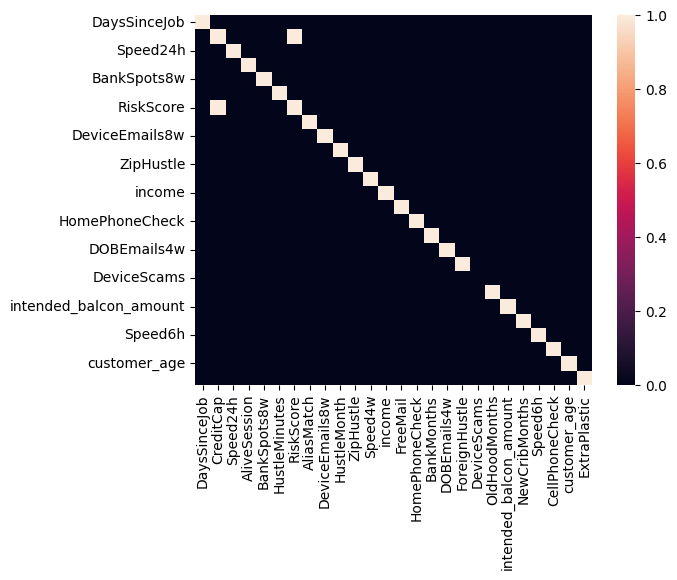

In [5]:
sns.heatmap(X_t0.select_dtypes(include='number').corr().abs()>0.6)  # th de 0.6 para ver existencia
plt.show()

In [6]:
# TODO: ver variables con *

In [11]:
X_t0.JobStatus

0         CB
1         CA
2         CA
3         CA
4         CA
          ..
397034    CA
397035    CA
397036    CA
397037    CA
397038    CA
Name: JobStatus, Length: 397039, dtype: object

Anotaciones con respecto a Features:
- A encodear: JobStatus, CribStatus, LootMethod, InfoSource, DeviceOS
- DeviceScams solo posee un valor (se puede descartar)
- RiskScore y CreditCap son las features más correlacionadas entre ellas mismas.
- Variables categóricas: JobStatus, CribStatus, LootMethod, InfoSource, DeviceOS, CreditCap*, AliveSession, DeviceEmails8w, HustleMonth, income*, FreeMail, HomePhoneCheck, ForeignHustle, CellPhoneCheck, customer_age, ExtraPlastic                  
- Variables discretas: BankSpots8w, RiskScore, ZipHustle, OldHoodMonths, NewCribMonths, CreditCap*, income*, BankMonths, DOBEmails4w
- Variables continuas: DaysSinceJob, Speed24h, HustleMinutes, AliasMatch, Speed4w, intended_balcon_amount, Speed6h
- Algunas features discretas tienen -1, se cree que deben tratarse como categóricas.

In [7]:
#Histograma simple
cols_discrete ='JobStatus, CribStatus, LootMethod, InfoSource, DeviceOS, AliveSession, DeviceEmails8w, HustleMonth, FreeMail, HomePhoneCheck, ForeignHustle, CellPhoneCheck, customer_age, ExtraPlastic, BankSpots8w, RiskScore, ZipHustle, OldHoodMonths, NewCribMonths, CreditCap, income, BankMonths, DOBEmails4w'.split(", ")
#Box + histograma 
cols_continuous = 'DaysSinceJob, Speed24h, HustleMinutes, AliasMatch, Speed4w, intended_balcon_amount, Speed6h'.split(", ")

In [8]:
def discrete_graph(cols):
    #4 por fila
    n_rows=len(cols)//4+ 1 if len(cols)%4!=0 else len(cols)/4
    fig = make_subplots(rows=n_rows,cols=4)
    for k in range(len(cols)):
        col,row = k%4+1,k//4+1
        fig.add_trace(go.Histogram(x=X_t0[cols[k]],name=f"Histograma de {cols[k]}"),row=row,col=col)
        fig.update_layout(height=1200,width=1600,title_text="Histogramas de las variables discretas")
    fig.write_html("Histogramas.html")

In [9]:
def cont_graph(cols):
    fig = make_subplots(rows=len(cols)+1,cols=2)
    for k in range(len(cols)):
        fig.add_trace(go.Box(y=X_t0[cols[k]],name=f"Boxplot de {cols[k]}"),row=k+1,col=1)
        fig.add_trace(go.Histogram(x=X_t0[cols[k]],name=f"Histograma de {cols[k]}"),row=k+1,col=2)
        fig.update_layout(height=1200,width=1600,title_text="Gráficos de las variables continuas")
    fig.write_html("Histogramas_y_boxplot.html")

Se muestran gráficos (no se hace display)

In [10]:
#discrete_graph(cols_discrete)

In [11]:
#cont_graph(cols_continuous)

Para las etiquetas:

In [12]:
y_t0.head(10)

Unnamed: 0  is_mob
0           0       0
1           1       0
2           2       0
3           3       0
4           4       0
5           5       0
6           6       0
7           7       0
8           8       0
9           9       0

In [13]:
y_t0.is_mob.value_counts()

is_mob
0    393143
1      3896
Name: count, dtype: int64

In [14]:
px.histogram(data_frame=y_t0,x="is_mob",title="Histograma etiquetas en t0")

## Preprocesamiento:
- Estandarizar
- Disminución dimensionalidad
- Discretización de variables numéricas
- Manejo de nulos
- etc

- income: va de 0 a 1, se refiere a la plata que recoge la crew
- AliasMatch: variable de 0 a 1, en general se ve buena.
- OldHoodMonths: muchos -1, BOTAR
- NewCribMonths: continua robustscaler seguramente
- customer_age:  discretizable encodeable

- DaysSinceJob: se puede dejar como categorica <0.05 ******************
- intended_balcon_amount: robustscaler
- LootMethod: onehot

- ZipHustle: posible standard
- Speed6h: posible standard
- Speed24h: posible standard
- Speed4w: Muy rara, prob. botarla
- BankSpots8w: robustscaler
- DOBEmails4w: robustscaler
- JobStatus: onehot
- RiskScore: standard (tiene negativos)
- FreeMail: todo bien
- CribStatus: onehot
- HomePhoneCheck: bien
- CellPhoneCheck: bien
- BankMonths: tiene -1, diria que esta bien, ROBUST
- ExtraPlastic: bien
- CreditCap: se podría categorizar *************************************
- ForeignHustle: bien
- InfoSource: bien
- HustleMinutes: tiene -1 aislado y es continua
- DeviceOS: onehot
- AliveSession: onehot
- DeviceEmails8w: tiene -1, se puede categorizar
- DeviceScams: 
- HustleMonth: esta bien, se puede categorizar

In [74]:
robust_scaler_features = "income,AliasMatch,NewCribMonths,customer_age,intended_balcon_amount,BankSpots8w,DOBEmails4w,BankMonths,CreditCap,DaysSinceJob,ZipHustle,Speed6h,Speed24h,RiskScore,HustleMinutes,Speed4w"
botar = "OldHoodMonths,DeviceScams"
imputer_features = "BankMonths,HustleMinutes,DeviceEmails8w,RiskScore,NewCribMonths"
one_hot_features = "JobStatus,CribStatus,LootMethod,InfoSource,DeviceOS,HustleMonth,DeviceEmails8w"
pass_features = "AliveSession,CellPhoneCheck,ExtraPlastic,ForeignHustle,FreeMail,HomePhoneCheck"

In [78]:
len(set(one_hot_features.split(",")+robust_scaler_features.split(",")+botar.split(",")+pass_features.split(",")))

31

In [77]:
len(X_t0.columns)

31

In [73]:
(X_t0.AliveSession).unique()

array([1, 0], dtype=int64)

(array([297631.,  25861.,  71916.,   1631.]),
 array([ 190. ,  667.5, 1145. , 1622.5, 2100. ]),
 <BarContainer object of 4 artists>)

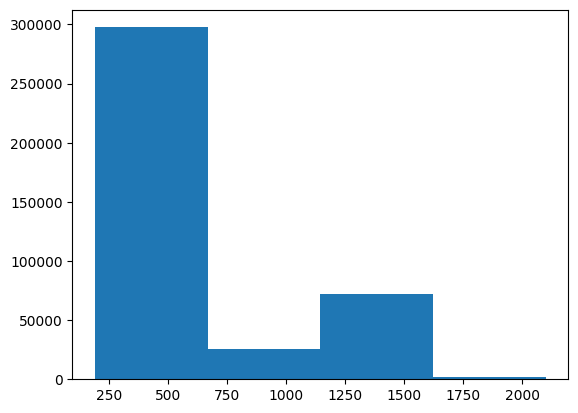

In [71]:
plt.hist(x=X_t0.CreditCap,bins=4)

In [16]:
robust_scaler_features = "income,AliasMatch,NewCribMonths,customer_age,intended_balcon_amount,BankSpots8w,DOBEmails4w,BankMonths,CreditCap,DaysSinceJob"
standard_features= "ZipHustle,Speed6h,Speed24h,RiskScore,HustleMinutes"
botar = "OldHoodMonths,Speed4w,DeviceScams"
imputer_features = "BankMonths,HustleMinutes,DeviceEmails8w"
one_hot_features = "JobStatus,CribStatus,LootMethod,InfoSource,DeviceOS"
pass_features = "AliveSession,CellPhoneCheck,ExtraPlastic,ForeignHustle,FreeMail,HomePhoneCheck,HustleMonth"

In [107]:
robust_scaler_features = "AliasMatch,NewCribMonths,customer_age,intended_balcon_amount,BankSpots8w,DOBEmails4w,BankMonths,CreditCap,DaysSinceJob,ZipHustle,Speed6h,Speed24h,RiskScore,HustleMinutes,Speed4w"
botar = "OldHoodMonths,DeviceScams"
imputer_features = "BankMonths,HustleMinutes,DeviceEmails8w,RiskScore,NewCribMonths"
one_hot_features = "income,JobStatus,CribStatus,LootMethod,InfoSource,DeviceOS,HustleMonth,DeviceEmails8w"
pass_features = "AliveSession,CellPhoneCheck,ExtraPlastic,ForeignHustle,FreeMail,HomePhoneCheck"

Primero se aplica imputer, luego lo demás.

In [108]:
def rename_features_after_imputer(imputer_features,other_features):
    list_features = other_features.split(",")
    list_imputer_features = imputer_features.split(",")
    new_list=[]
    for feature in list_features:
        if feature in list_imputer_features:
            new_list.append("imputer__"+feature)
        else:
            new_list.append("remainder__"+feature)
    return ",".join(new_list)

In [111]:
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
SEED = 40
imputer = ColumnTransformer([("imputer",SimpleImputer(missing_values=-1,strategy="mean"),imputer_features.split(","))],
                            remainder="passthrough")
imputer.set_output(transform='pandas')

col_transformer = ColumnTransformer([
                                    ("encoder",OneHotEncoder(drop="first",handle_unknown="infrequent_if_exist",sparse_output=False),rename_features_after_imputer(imputer_features,one_hot_features).split(",")),
                                     ("RobustScaler",RobustScaler(),rename_features_after_imputer(imputer_features,robust_scaler_features).split(",")),
                                     ("passthrough","passthrough",rename_features_after_imputer(imputer_features,pass_features).split(","))],
                                     remainder = "drop")
col_transformer.set_output(transform='pandas')

pipeline = Pipeline([("imputer",imputer),
                     ("col_transformer",col_transformer)])
#pipeline = Pipeline([("col_transformer",col_transformer),("classification_model",RandomForestClassifier(n_estimators=80,max_depth=15,class_weight="balanced"))])

In [112]:
X_trans = pipeline.fit_transform(X_t0)

In [127]:
X_t0.NewCribMonths.min()

-1

(array([163969.,  93248.,  35738.,  29710.,  29262.,  16094.,   9946.,
          7036.,  11145.,    891.]),
 array([ -1. ,  41.6,  84.2, 126.8, 169.4, 212. , 254.6, 297.2, 339.8,
        382.4, 425. ]),
 <BarContainer object of 10 artists>)

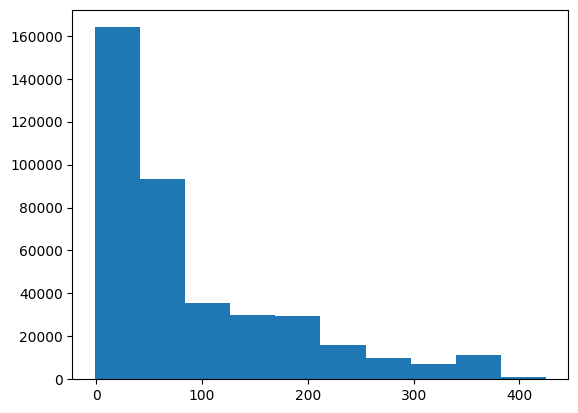

In [126]:
plt.hist(x=X_t0.NewCribMonths,bins=10 )

(array([3.68059e+05, 6.47600e+03, 1.03770e+04, 2.79600e+03, 2.94500e+03,
        2.37100e+03, 1.58900e+03, 8.97000e+02, 2.57000e+02, 3.50000e+01,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 2.05000e+02, 8.43000e+02, 1.87000e+02]),
 array([-7.62949321e-01,  1.89164530e+02,  3.79092010e+02,  5.69019490e+02,
         7.58946970e+02,  9.48874450e+02,  1.13880193e+03,  1.32872941e+03,
         1.51865689e+03,  1.70858437e+03,  1.89851185e+03,  2.08843933e+03,
         2.27836681e+03,  2.46829429e+03,  2.65822177e+03,  2.84814925e+03,
         3.03807673e+03,  3.22800421e+03,  3.41793169e+03,  3.60785917e+03,
         3.79778665e+03]),
 <BarContainer object of 20 artists>)

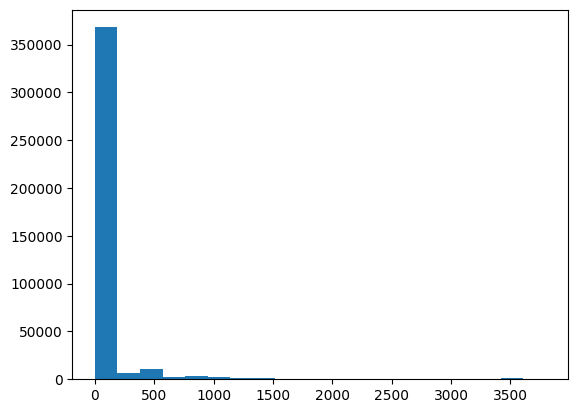

In [128]:
plt.hist(X_trans.RobustScaler__remainder__DaysSinceJob,bins=20)

In [88]:
col_transformer.get_feature_names_out()

array(['imputer__BankMonths', 'imputer__HustleMinutes',
       'imputer__DeviceEmails8w', 'imputer__RiskScore',
       'imputer__NewCribMonths', 'encoder__income_0.2',
       'encoder__income_0.3', 'encoder__income_0.4',
       'encoder__income_0.5', 'encoder__income_0.6000000000000001',
       'encoder__income_0.7000000000000001', 'encoder__income_0.8',
       'encoder__income_0.9', 'encoder__JobStatus_CB',
       'encoder__JobStatus_CC', 'encoder__JobStatus_CD',
       'encoder__JobStatus_CE', 'encoder__JobStatus_CF',
       'encoder__JobStatus_CG', 'encoder__CribStatus_BB',
       'encoder__CribStatus_BC', 'encoder__CribStatus_BD',
       'encoder__CribStatus_BE', 'encoder__CribStatus_BF',
       'encoder__CribStatus_BG', 'encoder__LootMethod_AB',
       'encoder__LootMethod_AC', 'encoder__LootMethod_AD',
       'encoder__LootMethod_AE', 'encoder__InfoSource_TELEAPP',
       'encoder__DeviceOS_macintosh', 'encoder__DeviceOS_other',
       'encoder__DeviceOS_windows', 'encoder__Devic

In [95]:
imputer = ColumnTransformer([("imputer",SimpleImputer(missing_values=-1,strategy="mean"),imputer_features.split(","))],
                            remainder="passthrough")
imputer.set_output(transform='pandas')
X_imputer = imputer.fit_transform(X_t0)

In [96]:
X_imputer

imputer__BankMonths  imputer__HustleMinutes  imputer__DeviceEmails8w  \
0                   9.00000               16.224843                      1.0   
1                   2.00000                3.363854                      1.0   
2                  30.00000               22.730559                      1.0   
3                   1.00000               15.215816                      1.0   
4                  26.00000                3.743048                      1.0   
...                     ...                     ...                      ...   
397034             26.00000               23.337101                      1.0   
397035              5.00000               13.307556                      1.0   
397036             15.04303                3.089539                      1.0   
397037             16.00000                7.049267                      1.0   
397038             15.04303                9.244074                      1.0   

        imputer__RiskScore  imputer__NewCribMonths  remainder__DaysSinceJob  \
0                    163.0                    25.0                 0.006735   
1                    154.0                    89.0                 0.010095   
2                     89.0                    14.0                 0.012316   
3                     90.0                    14.0                 0.006991   
4                     91.0                    29.0                 5.742626   
...                    ...                     ...                      ...   
397034                44.0                    27.0                 0.024010   
397035               194.0                   316.0                10.387120   
397036               189.0                    12.0                 0.011777   
397037               138.0                     2.0                 0.016757   
397038               152.0                    30.0                 0.006887   

        remainder__CreditCap remainder__JobStatus  remainder__Speed24h  \
0                     1500.0                   CB          7850.955007   
1                     1500.0                   CA          5745.251481   
2                      200.0                   CA          5471.988958   
3                      200.0                   CA          6755.344479   
4                      200.0                   CA          5124.046930   
...                      ...                  ...                  ...   
397034                 200.0                   CA          6088.406332   
397035                1000.0                   CA          5600.230367   
397036                 500.0                   CA          7488.503866   
397037                 200.0                   CA          7125.279859   
397038                 200.0                   CA          4923.451132   

        remainder__AliveSession  ...  remainder__HomePhoneCheck  \
0                             1  ...                          0   
1                             1  ...                          1   
2                             0  ...                          0   
3                             1  ...                          0   
4                             0  ...                          1   
...                         ...  ...                        ...   
397034                        1  ...                          1   
397035                        0  ...                          0   
397036                        1  ...                          0   
397037                        1  ...                          0   
397038                        0  ...                          1   

        remainder__DOBEmails4w remainder__ForeignHustle  \
0                            5                        0   
1                           18                        0   
2                           11                        0   
3                           13                        0   
4                            6                        0   
...                        ...                    

## Hold-out 70/30

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X_t0,y_t0.is_mob,test_size=0.3,random_state=40,stratify=y_t0.is_mob)

## Modelo baseline (sencillo)

In [21]:
X_test = col_transformer.fit_transform(X_t0)

In [31]:
pd.DataFrame(X_test,columns=col_transformer.get_feature_names_out()).describe().loc["min"]

encoder__JobStatus_CB                   0.000000
encoder__JobStatus_CC                   0.000000
encoder__JobStatus_CD                   0.000000
encoder__JobStatus_CE                   0.000000
encoder__JobStatus_CF                   0.000000
encoder__JobStatus_CG                   0.000000
encoder__CribStatus_BB                  0.000000
encoder__CribStatus_BC                  0.000000
encoder__CribStatus_BD                  0.000000
encoder__CribStatus_BE                  0.000000
encoder__CribStatus_BF                  0.000000
encoder__CribStatus_BG                  0.000000
encoder__LootMethod_AB                  0.000000
encoder__LootMethod_AC                  0.000000
encoder__LootMethod_AD                  0.000000
encoder__LootMethod_AE                  0.000000
encoder__InfoSource_TELEAPP             0.000000
encoder__DeviceOS_macintosh             0.000000
encoder__DeviceOS_other                 0.000000
encoder__DeviceOS_windows               0.000000
encoder__DeviceOS_x1

In [33]:
pipeline.steps.append(("classifier",DummyClassifier()))

In [69]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['JobStatus', 'CribStatus',
                                                   'LootMethod', 'InfoSource',
                                                   'DeviceOS']),
                                                 ('imputer',
                                                  SimpleImputer(missing_values=-1),
                                                  ['BankMonths',
                                                   'HustleMinutes',
                                                   'DeviceEmails8w']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['income', 'AliasMa...
                                                   'intended_balcon_amount',
                                                   'BankSpots8w', 'DOBEmails4w',
                                                   'BankMonths', 'CreditCap',
                                                   'DaysSinceJob']),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['ZipHustle', 'Speed6h',
                                                   'Speed24h', 'RiskScore',
                                                   'HustleMinutes']),
                                                 ('passthrough', 'passthrough',
                                                  ['AliveSession',
                                                   'CellPhoneCheck',
                                                   'ExtraPlastic',
                                                   'ForeignHustle', 'FreeMail',
                                                   'HomePhoneCheck',
                                                   'HustleMonth'])])),
                ('classifier', DummyClassifier())])

In [70]:
y_pred = pipeline.predict(X_val)

In [73]:
from sklearn.metrics import classification_report, roc_auc_score,recall_score
print(classification_report(y_val,y_pred))
print(roc_auc_score(y_val,y_pred))
print(recall_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    117943
           1       0.00      0.00      0.00      1169

    accuracy                           0.99    119112
   macro avg       0.50      0.50      0.50    119112
weighted avg       0.98      0.99      0.99    119112

0.5
0.0


c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

## 3 modelos de ML distintos a baseline. Solo pipelines de Sklearn.

- RandomForestClassifier
- LightGBMClassifier
- XGBClassifier

In [34]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score,recall_score, f1_score

pipeline_lightgbm = Pipeline([("col_transformer",col_transformer),
                              ("classification_model",LGBMClassifier(class_weight="balanced",random_state=SEED))])
pipeline_xgboost = Pipeline([("col_transformer",col_transformer),
                             ("classification_model",XGBClassifier(random_state=SEED))])
pipeline_randomforest = Pipeline([("col_transformer",col_transformer),
                                  ("classification_model",RandomForestClassifier(n_estimators=80,max_depth=15,class_weight="balanced",random_state=SEED))])

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



In [78]:
pipeline_randomforest.fit(X_train,y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='infrequent_if_exist'),
                                                  ['JobStatus', 'CribStatus',
                                                   'LootMethod', 'InfoSource',
                                                   'DeviceOS']),
                                                 ('imputer',
                                                  SimpleImputer(missing_values=-1),
                                                  ['BankMonths',
                                                   'HustleMinutes',
                                                   'DeviceEmails8w']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['income', 'AliasMa...
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['ZipHustle', 'Speed6h',
                                                   'Speed24h', 'RiskScore',
                                                   'HustleMinutes']),
                                                 ('passthrough', 'passthrough',
                                                  ['AliveSession',
                                                   'CellPhoneCheck',
                                                   'ExtraPlastic',
                                                   'ForeignHustle', 'FreeMail',
                                                   'HomePhoneCheck',
                                                   'HustleMonth'])])),
                ('classification_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        n_estimators=80, random_state=40))])

In [81]:
y_pred = pipeline_randomforest.predict(X_val)

In [82]:

print(classification_report(y_val,y_pred))
print(roc_auc_score(y_val,y_pred))
print(recall_score(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    117943
           1       0.14      0.22      0.17      1169

    accuracy                           0.98    119112
   macro avg       0.57      0.61      0.58    119112
weighted avg       0.98      0.98      0.98    119112

0.6052913715906917
0.22412318220701455


## Optimización de modelos de ML

### XGB

In [129]:
from sklearn.metrics import classification_report, roc_auc_score,recall_score, precision_recall_curve, auc

In [75]:
import optuna
from optuna.samplers import TPESampler
def objective_function(trial):
    X_train,X_val,y_train,y_val = train_test_split(X_t0,y_t0.is_mob,test_size=0.3,random_state=40,stratify=y_t0.is_mob)

    params_xgb = {

        "learning_rate": trial.suggest_loguniform("learning_rate",0.001,0.1),
        "n_estimators": trial.suggest_int("n_estimators",50,1000),
        "max_depth": trial.suggest_int("max_depth",3,10),
        "max_leaves": trial.suggest_int("max_leaves",0,100),
        "min_child_weight": trial.suggest_int("min_child_weight",1,5),
        "reg_alpha": trial.suggest_float("reg_alpha",0,1),
        "reg_lambda": trial.suggest_float("reg_lambda",0,1)
    }

    params_one_hot_encoder = {"drop":"first",
                              "sparse_output":False,
                              "handle_unknown":"ignore",
        "min_frequency":trial.suggest_float("min_frequency",0,1)}
    
    col_transformer = ColumnTransformer([("encoder",OneHotEncoder(**params_one_hot_encoder),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,strategy="mean"),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")
    pipeline = Pipeline([("col_transformer",col_transformer),
                             ("classification_model",XGBClassifier(random_state=SEED,**params_xgb))])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_val)
    return recall_score(y_val,y_pred)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(direction="maximize",sampler=TPESampler())
study.optimize(objective_function,timeout=500)

C:\Users\sebas\AppData\Local\Temp\ipykernel_19248\2496364951.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate",0.001,0.1),
C:\Users\sebas\AppData\Local\Temp\ipykernel_19248\2496364951.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate",0.001,0.1),
C:\Users\sebas\AppData\Local\Temp\ipykernel_19248\2496364951.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_logunif

In [76]:
df_trials = study.trials_dataframe(multi_index=True)
len(df_trials)

42

### LGBM

In [ ]:
import optuna
from optuna.samplers import TPESampler
def objective_function(trial):
    X_train,X_val,y_train,y_val = train_test_split(X_t0,y_t0.is_mob,test_size=0.3,random_state=SEED,stratify=y_t0.is_mob)

    params_lgbm = {

        "num_leaves": trial.suggest_int("num_leaves",30,120),
        "max_depth": trial.suggest_int("max_depth",3,10),
        "learning_rate": trial.suggest_loguniform("learning_rate",0.001,0.1),
        "n_estimators": trial.suggest_int("n_estimators ",20,100),
        "min_child_samples":trial.suggest_int("min_child_samples",5,10),
        "reg_alpha": trial.suggest_float("reg_alpha",0,1),
        "reg_lambda": trial.suggest_float("reg_lambda",0,1),
        "n_jobs":-1
    }

    params_one_hot_encoder = {"drop":"first",
                              "sparse_output":False,
                              "handle_unknown":"ignore",
        "min_frequency":trial.suggest_float("min_frequency",0,1)}
    
    #params_pca = {"n_components":trial.suggest_int("n_components",10,20)}

    params_imputer = {"strategy": trial.suggest_categorical("strategy",["mean","median","most_frequent"])}
    
    col_transformer = ColumnTransformer([("encoder",OneHotEncoder(**params_one_hot_encoder),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,**params_imputer),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")
    pipeline = Pipeline([("col_transformer",col_transformer),
                         #("pca",PCA(**params_pca)),
                        ("classification_model",LGBMClassifier(class_weight= "balanced",random_state=SEED,**params_lgbm))])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_val)
    
    return f1_score(y_val,y_pred)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgbm = optuna.create_study(direction="maximize",sampler=TPESampler())
study_lgbm.optimize(objective_function,timeout=800)

In [70]:
df_trials = study_lgbm.trials_dataframe(multi_index=True)
len(df_trials)

141

In [71]:
df_trials

number     value             datetime_start          datetime_complete  \
                                                                             
0        0  0.060671 2024-07-05 18:56:01.777345 2024-07-05 18:56:06.565412   
1        1  0.078857 2024-07-05 18:56:06.566412 2024-07-05 18:56:12.506682   
2        2  0.054976 2024-07-05 18:56:12.507685 2024-07-05 18:56:18.394508   
3        3  0.071188 2024-07-05 18:56:18.394508 2024-07-05 18:56:23.231076   
4        4  0.044692 2024-07-05 18:56:23.231076 2024-07-05 18:56:27.328124   
..     ...       ...                        ...                        ...   
136    136  0.120926 2024-07-05 19:08:57.068377 2024-07-05 19:09:03.022927   
137    137  0.108033 2024-07-05 19:09:03.022927 2024-07-05 19:09:09.267224   
138    138  0.118255 2024-07-05 19:09:09.267224 2024-07-05 19:09:15.132218   
139    139  0.119416 2024-07-05 19:09:15.132722 2024-07-05 19:09:20.848995   
140    140  0.122231 2024-07-05 19:09:20.848995 2024-07-05 19:09:26.554106   

                  duration        params                              \
                           learning_rate max_depth min_child_samples   
0   0 days 00:00:04.788067      0.065238         5                 6   
1   0 days 00:00:05.940270      0.086121         8                 9   
2   0 days 00:00:05.886823      0.004062        10                 8   
3   0 days 00:00:04.836568      0.045841         9                 7   
4   0 days 00:00:04.097048      0.006214         3                10   
..                     ...           ...       ...               ...   
136 0 days 00:00:05.954550      0.092293        10                 9   
137 0 days 00:00:06.244297      0.069799        10                 9   
138 0 days 00:00:05.864994      0.090887        10                 9   
139 0 days 00:00:05.716273      0.092553        10                 9   
140 0 days 00:00:05.705111      0.093477        10                 9   

                                                                 \
    min_frequency n_estimators  num_leaves reg_alpha reg_lambda   
0        0.882612            27         45  0.243221   0.062425   
1        0.898519           100         42  0.561769   0.944859   
2        0.472828            93         35  0.614070   0.333383   
3        0.261905            40         55  0.908671   0.435597   
4        0.189819            33         70  0.029449   0.364827   
..            ...           ...        ...       ...        ...   
136      0.003060            90        103  0.781960   0.304674   
137      0.002267            86        103  0.781857   0.304546   
138      0.022714            90        102  0.793324   0.256257   
139      0.027876            90        102  0.793981   0.274349   
140      0.029607            89        102  0.785820   0.235120   

                       state  
          strategy            
0             mean  COMPLETE  
1    most_frequent  COMPLETE  
2    most_frequent  COMPLETE  
3           median  COMPLETE  
4           median  COMPLETE  
..             ...       ...  
136           mean  COMPLETE  
137           mean  COMPLETE  
138           mean  COMPLETE  
139           mean  COMPLETE  
140           mean  COMPLETE  

[141 rows x 15 columns]

In [72]:
lgbm_params = df_trials[df_trials.value==df_trials.value.max()].params.to_dict("records")[0]

In [73]:
df_trials[df_trials.value==df_trials.value.max()]

number     value             datetime_start          datetime_complete  \
                                                                             
140    140  0.122231 2024-07-05 19:09:20.848995 2024-07-05 19:09:26.554106   

                  duration        params                              \
                           learning_rate max_depth min_child_samples   
140 0 days 00:00:05.705111      0.093477        10                 9   

                                                                          \
    min_frequency n_estimators  num_leaves reg_alpha reg_lambda strategy   
140      0.029607            89        102   0.78582    0.23512     mean   

        state  
               
140  COMPLETE

In [74]:
lgbm_params

{'learning_rate': 0.09347673880009832,
 'max_depth': 10,
 'min_child_samples': 9,
 'min_frequency': 0.029607023660036265,
 'n_estimators ': 89,
 'num_leaves': 102,
 'reg_alpha': 0.7858204900235045,
 'reg_lambda': 0.23511964266918378,
 'strategy': 'mean'}

In [75]:
col_transformer = ColumnTransformer([("encoder",OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore",min_frequency=lgbm_params["min_frequency"]),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,strategy=lgbm_params["strategy"]),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")

final_pipe = pipeline = Pipeline([("col_transformer",col_transformer),
                                  #("pca",PCA(n_components=lgbm_params["n_components"])),
                             ("classification_model",LGBMClassifier(learning_rate=lgbm_params["learning_rate"],
                                                                    min_child_samples=lgbm_params["min_child_samples"],
                                                                    max_depth = lgbm_params["max_depth"],
                                                                    n_estimators=lgbm_params["n_estimators "],
                                                                    num_leaves=lgbm_params["num_leaves"],
                                                                    reg_alpha = lgbm_params["reg_alpha"],
                                                                    reg_lambda = lgbm_params["reg_lambda"],
                                                                    class_weight="balanced",
                                                                    random_state=SEED))])

In [76]:
final_pipe.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 2727, number of negative: 275200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2990
[LightGBM] [Info] Number of data points in the train set: 277927, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                min_frequency=0.029607023660036265,
                                                                sparse_output=False),
                                                  ['JobStatus', 'CribStatus',
                                                   'LootMethod', 'InfoSource',
                                                   'DeviceOS']),
                                                 ('imputer',
                                                  SimpleImputer(missing_values=-1),
                                                  ['BankMonths',
                                                   'HustleMinutes',
                                                   'DeviceEmails8w']),
                                                 ('Robus...
                                                  ['AliveSession',
                                                   'CellPhoneCheck',
                                                   'ExtraPlastic',
                                                   'ForeignHustle', 'FreeMail',
                                                   'HomePhoneCheck',
                                                   'HustleMonth'])])),
                ('classification_model',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.09347673880009832, max_depth=10,
                                min_child_samples=9, n_estimators=89,
                                num_leaves=102, random_state=40,
                                reg_alpha=0.7858204900235045,
                                reg_lambda=0.23511964266918378))])

In [77]:
from sklearn.metrics import classification_report, roc_auc_score,recall_score, precision_recall_curve, auc
y_pred = final_pipe.predict(X_val)
precision,recall,tresholds = precision_recall_curve(y_val,y_pred)
print(auc(recall,precision))
print(classification_report(y_val,y_pred))
print(roc_auc_score(y_val,y_pred))
print(recall_score(y_val,y_pred))

0.33456503449870606
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    117943
           1       0.07      0.60      0.12      1169

    accuracy                           0.92    119112
   macro avg       0.53      0.76      0.54    119112
weighted avg       0.99      0.92      0.95    119112

0.7580431499413526
0.5970915312232677


In [78]:
y_pred2 = final_pipe.predict(X_train)

In [79]:
print(classification_report(y_train,y_pred2))
print(roc_auc_score(y_train,y_pred2))
print(recall_score(y_train,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    275200
           1       0.11      1.00      0.20      2727

    accuracy                           0.92    277927
   macro avg       0.56      0.96      0.58    277927
weighted avg       0.99      0.92      0.95    277927

0.9587498467627771
0.995966263292996


In [68]:
lgbm_params

{'learning_rate': 0.08478162283940756,
 'max_depth': 9,
 'min_child_samples': 5,
 'min_frequency': 0.9042093440104251,
 'n_components': 20,
 'n_estimators ': 93,
 'num_leaves': 119,
 'reg_alpha': 0.9571655929297778,
 'reg_lambda': 0.5596544741156921,
 'strategy': 'mean'}

### RandomForest

In [146]:
import optuna
from optuna.samplers import TPESampler
def objective_function(trial):
    X_train,X_val,y_train,y_val = train_test_split(X_t0,y_t0.is_mob,test_size=0.3,random_state=40,stratify=y_t0.is_mob)

    params_rfc = {

        "n_estimators": trial.suggest_int("n_estimators",30,1000),
        "max_depth": trial.suggest_int("max_depth",5,50),
        "min_samples_split": trial.suggest_int("min_samples_split",2,5),
    }

    params_one_hot_encoder = {"drop":"first",
                              "sparse_output":False,
                              "handle_unknown":"ignore",
        "min_frequency":trial.suggest_float("min_frequency",0,1)}
    
    col_transformer = ColumnTransformer([("encoder",OneHotEncoder(**params_one_hot_encoder),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,strategy="mean"),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")
    
    pipeline = Pipeline([("col_transformer",col_transformer),
                             ("classification_model",RandomForestClassifier(class_weight = "balanced",random_state=SEED,**params_rfc))])
    
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_val)
    precision,recall,tresholds = precision_recall_curve(y_val,y_pred)
    
    return auc(recall,precision)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_rfc = optuna.create_study(direction="maximize",sampler=TPESampler())
study_rfc.optimize(objective_function,timeout=700)

In [149]:
df_trials = study_lgbm.trials_dataframe(multi_index=True)
len(df_trials)

2

In [158]:
params_rfc = df_trials.params.iloc[0].to_dict()

In [159]:
params_rfc

{'max_depth': 6.0,
 'min_frequency': 0.7785996547040092,
 'min_samples_split': 5.0,
 'n_estimators': 47.0}

In [168]:
col_transformer = ColumnTransformer([("encoder",OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore"),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,strategy="mean"),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")
pipeline_rfc_opt = Pipeline([("col_transformer",col_transformer),
                             ("classification_model",RandomForestClassifier(max_depth = int(params_rfc["max_depth"]),
                                                                            min_samples_split= int(params_rfc["min_samples_split"]),
                                                                            n_estimators=int(params_rfc["n_estimators"]),
                                                                            class_weight = "balanced",
                                                                            random_state=SEED))])

In [169]:
pipeline_rfc_opt.fit(X_train,y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['JobStatus', 'CribStatus',
                                                   'LootMethod', 'InfoSource',
                                                   'DeviceOS']),
                                                 ('imputer',
                                                  SimpleImputer(missing_values=-1),
                                                  ['BankMonths',
                                                   'HustleMinutes',
                                                   'DeviceEmails8w']),
                                                 ('RobustScaler',
                                                  RobustScaler(),
                                                  ['income', '...
                                                  StandardScaler(),
                                                  ['ZipHustle', 'Speed6h',
                                                   'Speed24h', 'RiskScore',
                                                   'HustleMinutes']),
                                                 ('passthrough', 'passthrough',
                                                  ['AliveSession',
                                                   'CellPhoneCheck',
                                                   'ExtraPlastic',
                                                   'ForeignHustle', 'FreeMail',
                                                   'HomePhoneCheck',
                                                   'HustleMonth'])])),
                ('classification_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=6,
                                        min_samples_split=5, n_estimators=47,
                                        random_state=40))])

In [170]:
y_pred = pipeline_rfc_opt.predict(X_val)

In [173]:
from sklearn.metrics import classification_report, roc_auc_score,recall_score, precision_recall_curve, auc
y_pred = pipeline_rfc_opt.predict(X_val)
precision,recall,tresholds = precision_recall_curve(y_val,y_pred)
print(auc(recall,precision))
print(classification_report(y_val,y_pred))
print(roc_auc_score(y_val,y_pred))
print(recall_score(y_val,y_pred))

0.3797851466197444
              precision    recall  f1-score   support

           0       1.00      0.83      0.90    117943
           1       0.04      0.72      0.07      1169

    accuracy                           0.82    119112
   macro avg       0.52      0.77      0.49    119112
weighted avg       0.99      0.82      0.89    119112

0.7714258958237261
0.7177074422583405


## Interpretabilidad de modelo con mejores resultados

In [131]:
X_t1

DaysSinceJob  CreditCap JobStatus     Speed24h  AliveSession  \
0           0.027266     1500.0        CA  7190.962740             1   
1           0.010911      200.0        CA  4118.268558             1   
2           0.943734      200.0        CA  5236.372041             0   
3           0.462307     1000.0        CA  4716.560298             1   
4           0.002047      200.0        CA  5397.528448             1   
...              ...        ...       ...          ...           ...   
273860      0.009546      200.0        CA  4782.602541             0   
273861      0.018323      200.0        CA  4231.619005             1   
273862      0.027740      200.0        CA  3457.980788             0   
273863      0.003323      500.0        CB  2940.132694             0   
273864      0.008720      200.0        CA  2752.100888             1   

        BankSpots8w  HustleMinutes  RiskScore  AliasMatch  DeviceEmails8w  \
0                 1      25.908272        230    0.389021               1   
1                 1       4.240641        112    0.069858               1   
2                 2      11.019222         73    0.328285               1   
3                 1      16.818389        215    0.167489               1   
4              1794      33.486803         72    0.651517               1   
...             ...            ...        ...         ...             ...   
273860            0       3.333532        172    0.853425               1   
273861            5       1.551552        134    0.986176               1   
273862         1340       4.592557         82    0.640044               1   
273863           12      13.725677        165    0.247717               1   
273864            9       4.488189        226    0.201845               1   

        ... DOBEmails4w ForeignHustle DeviceScams  OldHoodMonths  \
0       ...           5             0           0             -1   
1       ...           7             1           0            119   
2       ...           9             0           0            100   
3       ...           2             0           0             -1   
4       ...          12             0           0             -1   
...     ...         ...           ...         ...            ...   
273860  ...           7             0           0             -1   
273861  ...          11             0           0             -1   
273862  ...           7             0           0             -1   
273863  ...           2             1           0             -1   
273864  ...           9             0           0             -1   

        intended_balcon_amount  NewCribMonths      Speed6h  CellPhoneCheck  \
0                    -0.606947             48  9582.063142               1   
1                    -1.112835              4  1574.485203               1   
2                    -0.433109             27  8173.509757               1   
3                    -1.154959            158  3677.795054               0   
4                    51.871481             41  7268.270092               1   
...                        ...            ...          ...             ...   
273860               -0.982921            348  5910.576235               1   
273861               -1.257413             17  3601.093819               1   
273862               18.215573             39  2633.706268               1   
273863               -1.154079             40  3909.721085               1   
273864               50.934881            120  3492.743993               1   

        customer_age  ExtraPlastic  
0                 50             0  
1                 30             0  
2                 30             0  
3                 50             0  
4                 50             0  
...              ...           ...  
273860            50             1  
273861            30             1  
273862            20             0  
273863            60             0  
273864            30             1  

[273865 rows x 31 c

In [81]:
len(X_t1)

273865

### Parte 2

In [13]:
import pandas as pd
from lightgbm import LGBMClassifier

c:\Users\sebas\anaconda3\envs\pytorchgpu\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [14]:
X_t0 = pd.read_csv(r"X_t0")
y_t0 = pd.read_csv(r"y_t0")
X_t1 = pd.read_csv(r"X_t1")
y_t1 = pd.read_csv(r"y_t1")

In [15]:
robust_scaler_features = "income,AliasMatch,NewCribMonths,customer_age,intended_balcon_amount,BankSpots8w,DOBEmails4w,BankMonths,CreditCap,DaysSinceJob"
standard_features= "ZipHustle,Speed6h,Speed24h,RiskScore,HustleMinutes"
botar = "OldHoodMonths,Speed4w,DeviceScams"
imputer_features = "BankMonths,HustleMinutes,DeviceEmails8w"
one_hot_features = "JobStatus,CribStatus,LootMethod,InfoSource,DeviceOS"
pass_features = "AliveSession,CellPhoneCheck,ExtraPlastic,ForeignHustle,FreeMail,HomePhoneCheck,HustleMonth"

In [16]:
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
SEED = 40
col_transformer = ColumnTransformer([("encoder",OneHotEncoder(drop="first",handle_unknown="infrequent_if_exist"),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,strategy="mean"),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")
pipeline = Pipeline([("col_transformer",col_transformer)])

### LGBM

Optimizacion para t1

In [54]:
import optuna
from optuna.samplers import TPESampler
def objective_function(trial):
    X_train,X_val,y_train,y_val = train_test_split(X_t1,y_t1.is_mob,test_size=0.3,random_state=SEED,stratify=y_t1.is_mob)

    params_lgbm = {

        "num_leaves": trial.suggest_int("num_leaves",100,1000),
        "max_depth": trial.suggest_int("max_depth",5,20),
        "learning_rate": trial.suggest_float("learning_rate",0.001,0.1,log=True),
        "n_estimators": trial.suggest_int("n_estimators ",20,100),
        "min_child_samples":trial.suggest_int("min_child_samples",5,10),
        "reg_alpha": trial.suggest_float("reg_alpha",0,1),
        "reg_lambda": trial.suggest_float("reg_lambda",0,1),
        "n_jobs":-1
    }

    params_one_hot_encoder = {"drop":"first",
                              "sparse_output":False,
                              "handle_unknown":"ignore",
        "min_frequency":trial.suggest_float("min_frequency",0,1)}
    
    #params_pca = {"n_components":trial.suggest_int("n_components",10,20)}

    params_imputer = {"strategy": trial.suggest_categorical("strategy",["mean","median","most_frequent"])}
    
    col_transformer = ColumnTransformer([("encoder",OneHotEncoder(**params_one_hot_encoder),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,**params_imputer),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")
    pipeline = Pipeline([("col_transformer",col_transformer),
                         #("pca",PCA(**params_pca)),
                        ("classification_model",LGBMClassifier(class_weight= "balanced",random_state=SEED,**params_lgbm))])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_val)
    
    return f1_score(y_val,y_pred)
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgbm = optuna.create_study(direction="maximize",sampler=TPESampler())
study_lgbm.optimize(objective_function,n_trials=100,show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 2327, number of negative: 189378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2957
[LightGBM] [Info] Number of data points in the train set: 191705, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [55]:
study_lgbm.best_params

{'num_leaves': 486,
 'max_depth': 19,
 'learning_rate': 0.061511752393754,
 'n_estimators ': 97,
 'min_child_samples': 9,
 'reg_alpha': 0.9906519695833536,
 'reg_lambda': 0.00041796599934526557,
 'min_frequency': 0.13024209573142026,
 'strategy': 'most_frequent'}

### Con X_t0

In [67]:
lgbm_params={'learning_rate': 0.08478162283940756,
 'max_depth': 9,
 'min_child_samples': 5,
 'min_frequency': 0.9042093440104251,
 'n_components': 20,
 'n_estimators ': 93,
 'num_leaves': 119,
 'reg_alpha': 0.9571655929297778,
 'reg_lambda': 0.5596544741156921,
 'strategy': 'mean'}

In [69]:
col_transformer = ColumnTransformer([("encoder",OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore",min_frequency=lgbm_params["min_frequency"]),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,strategy=lgbm_params["strategy"]),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")

final_pipe_t0 = pipeline = Pipeline([("col_transformer",col_transformer),
                                  #("pca",PCA(n_components=lgbm_params["n_components"])),
                             ("classification_model",LGBMClassifier(learning_rate=lgbm_params["learning_rate"],
                                                                    min_child_samples=lgbm_params["min_child_samples"],
                                                                    max_depth = lgbm_params["max_depth"],
                                                                    n_estimators=lgbm_params["n_estimators "],
                                                                    num_leaves=lgbm_params["num_leaves"],
                                                                    reg_alpha = lgbm_params["reg_alpha"],
                                                                    reg_lambda = lgbm_params["reg_lambda"],
                                                                    class_weight="balanced",
                                                                    random_state=SEED))])

### CON t1

In [57]:
lgbm_params = {'num_leaves': 486,
 'max_depth': 19,
 'learning_rate': 0.061511752393754,
 'n_estimators ': 97,
 'min_child_samples': 9,
 'reg_alpha': 0.9906519695833536,
 'reg_lambda': 0.00041796599934526557,
 'min_frequency': 0.13024209573142026,
 'strategy': 'most_frequent'}

In [59]:
col_transformer = ColumnTransformer([("encoder",OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore",min_frequency=lgbm_params["min_frequency"]),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,strategy=lgbm_params["strategy"]),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")

final_pipe_t1 = pipeline = Pipeline([("col_transformer",col_transformer),
                                  #("pca",PCA(n_components=lgbm_params["n_components"])),
                             ("classification_model",LGBMClassifier(learning_rate=lgbm_params["learning_rate"],
                                                                    min_child_samples=lgbm_params["min_child_samples"],
                                                                    max_depth = lgbm_params["max_depth"],
                                                                    n_estimators=lgbm_params["n_estimators "],
                                                                    num_leaves=lgbm_params["num_leaves"],
                                                                    reg_alpha = lgbm_params["reg_alpha"],
                                                                    reg_lambda = lgbm_params["reg_lambda"],
                                                                    class_weight="balanced",
                                                                    random_state=SEED))])

### XGBOOST

In [50]:
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

def objective_function(trial):
    X_train,X_val,y_train,y_val = train_test_split(X_t0,y_t0.is_mob,test_size=0.3,random_state=40,stratify=y_t0.is_mob)

    params_xgb = {

        "learning_rate": trial.suggest_float("learning_rate",0.01,0.1,log=True),
        "n_estimators": trial.suggest_int("n_estimators",20,1000),
        "max_depth": trial.suggest_int("max_depth",20,100),
        "max_leaves": trial.suggest_int("max_leaves",5,20),
        "min_child_weight": trial.suggest_int("min_child_weight",1,5),
        "reg_alpha": trial.suggest_float("reg_alpha",0,1),
        "reg_lambda": trial.suggest_float("reg_lambda",0,1)
    }

    params_one_hot_encoder = {"drop":"first",
                              "sparse_output":False,
                              "handle_unknown":"ignore",
        "min_frequency":trial.suggest_float("min_frequency",0,1)}
    
    params_imputer = {"strategy": trial.suggest_categorical("strategy",["mean","median","most_frequent"])}
    
    col_transformer = ColumnTransformer([("encoder",OneHotEncoder(**params_one_hot_encoder),one_hot_features.split(",")),
                                     ("imputer",SimpleImputer(missing_values=-1,**params_imputer),imputer_features.split(",")),
                                     ("RobustScaler",RobustScaler(),robust_scaler_features.split(",")),
                                     ("StandardScaler",StandardScaler(),standard_features.split(",")),
                                     ("passthrough","passthrough",pass_features.split(","))],
                                     remainder = "drop")
    pipeline = Pipeline([("col_transformer",col_transformer),
                             ("classification_model",XGBClassifier(random_state=SEED,**params_xgb))])
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_val)
    return f1_score(y_val,y_pred)
optuna.logging.set_verbosity(optuna.logging.WARNING)
xgb_study = optuna.create_study(direction="maximize",sampler=TPESampler())
xgb_study.optimize(objective_function,timeout=500,n_jobs=5)

In [51]:
df_trials = xgb_study.trials_dataframe(multi_index=True)
len(df_trials)

42

In [53]:
df_trials[df_trials.value==df_trials.value.max()]

number    value             datetime_start          datetime_complete  \
                                                                          
8      8  0.07081 2024-07-11 19:50:27.423215 2024-07-11 19:51:56.836824   

                duration        params                                        \
                         learning_rate max_depth max_leaves min_child_weight   
8 0 days 00:01:29.413609      0.097145        79         16                3   

                                                                     state  
  min_frequency n_estimators reg_alpha reg_lambda       strategy            
8      0.220739          966  0.783255   0.060047  most_frequent  COMPLETE

### final_pipe

Se usa t1 para reentrenamiento

In [89]:
from sklearn.model_selection import train_test_split
X_train_t0,X_val_t0,y_train_t0,y_val_t0 = train_test_split(X_t0,y_t0.is_mob,test_size=0.3,random_state=40,stratify=y_t0.is_mob)
X_train_t1,X_val_t1,y_train_t1,y_val_t1 = train_test_split(X_t1,y_t1.is_mob,test_size=0.3,random_state=40,stratify=y_t1.is_mob)

Se entrena t0

In [71]:
final_pipe_t0.fit(X_train_t0,y_train_t0)

[LightGBM] [Info] Number of positive: 2727, number of negative: 275200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2958
[LightGBM] [Info] Number of data points in the train set: 277927, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                min_frequency=0.9042093440104251,
                                                                sparse_output=False),
                                                  ['JobStatus', 'CribStatus',
                                                   'LootMethod', 'InfoSource',
                                                   'DeviceOS']),
                                                 ('imputer',
                                                  SimpleImputer(missing_values=-1),
                                                  ['BankMonths',
                                                   'HustleMinutes',
                                                   'DeviceEmails8w']),
                                                 ('RobustS...
                                                 ('passthrough', 'passthrough',
                                                  ['AliveSession',
                                                   'CellPhoneCheck',
                                                   'ExtraPlastic',
                                                   'ForeignHustle', 'FreeMail',
                                                   'HomePhoneCheck',
                                                   'HustleMonth'])])),
                ('classification_model',
                 LGBMClassifier(class_weight='balanced',
                                learning_rate=0.08478162283940756, max_depth=9,
                                min_child_samples=5, n_estimators=93,
                                num_leaves=119, random_state=40,
                                reg_alpha=0.9571655929297778,
                                reg_lambda=0.5596544741156921))])

Se guarda modelo en t0

In [73]:
t0_model = final_pipe_t0["classification_model"]
t0_model.booster_.save_model("model_t0.txt")

Se instancia nuevo clasificador

In [88]:
new_classifier = LGBMClassifier()

Se transforman X con col transformer anterior (OJO puede cambiar dependiendo del data shift)

In [90]:
X_train_t1 = final_pipe_t0["col_transformer"].transform(X_train_t1)
X_val_t1 = final_pipe_t0["col_transformer"].transform(X_val_t1)

Se reentrena

In [92]:
new_classifier.fit(X_train_t1,y_train_t1,init_model="model_t0.txt")

[LightGBM] [Info] Number of positive: 2327, number of negative: 189378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2957
[LightGBM] [Info] Number of data points in the train set: 191705, number of used features: 26


LGBMClassifier()

In [94]:
y_hat_t1 = new_classifier.predict(X_val_t1)

In [96]:
from sklearn.metrics import classification_report, roc_auc_score,recall_score, precision_recall_curve, auc
print(classification_report(y_val_t1,y_hat_t1))
print(roc_auc_score(y_val_t1,y_hat_t1))
print(recall_score(y_val_t1,y_hat_t1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     81163
           1       0.34      0.03      0.05       997

    accuracy                           0.99     82160
   macro avg       0.67      0.51      0.52     82160
weighted avg       0.98      0.99      0.98     82160

0.5122419115953383
0.025075225677031094


In [ ]:
final_pipe.fit(X_train,y_train)

In [31]:
y_hat

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
y_t1.is_mob.value_counts()

is_mob
0    270541
1      3324
Name: count, dtype: int64

### Generate files

In [64]:
X_t2 = pd.read_csv("X_t2")

In [65]:
from zipfile import ZipFile
import os

def generateFiles(predict_data, clf_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    ---------------
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf

    Ouput
    ---------------
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict_proba(predict_data)[:, 1]
    
    with open('./predictions.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zipObj:
       zipObj.write('predictions.txt')
    os.remove('predictions.txt')

generateFiles(X_t2, final_pipe)

In [66]:
len(X_t2)

136092